In [3]:
pip install faker

You should consider upgrading via the 'C:\Users\MrAKB\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
import csv
import random
from faker import Faker
from datetime import datetime

In [5]:
# Initialize Faker
fake = Faker()
random.seed(42)

In [6]:
# Define the schema fields
fields = [
    'order_id', 'customer_id', 'customer_name', 'product_id', 'product_name',
    'product_category', 'payment_type', 'qty', 'price', 'datetime', 'country',
    'city', 'ecommerce_website_name', 'payment_txn_id', 'payment_txn_success',
    'failure_reason'
]

In [7]:
# Define sample data
product_categories = ['Stationery', 'Electronics', 'Books', 'Clothing', 'Toys']
payment_types = ['Card', 'Internet Banking', 'UPI', 'Wallet']
countries = {
    'India': ['Mumbai', 'Delhi', 'Bengaluru', 'Chennai', 'Kolkata'],
    'USA': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Boston'],
    'UK': ['London', 'Manchester', 'Birmingham', 'Leeds', 'Oxford'],
    'Germany': ['Berlin', 'Munich', 'Frankfurt', 'Hamburg', 'Stuttgart']
}
websites = ['www.amazon.com', 'www.flipkart.com', 'www.ebay.in', 'www.tatacliq.com', 'www.snapdeal.com']

In [8]:
# Function to generate a single record
def generate_record(order_id):
    customer_id = random.randint(100, 999)
    customer_name = fake.name()
    product_id = random.randint(200, 299)
    product_name = fake.word().capitalize()
    product_category = random.choice(product_categories)
    payment_type = random.choice(payment_types)
    qty = random.randint(1, 10)
    price = round(random.uniform(5.0, 1000.0), 2)
    order_datetime = fake.date_time_between(start_date='-1y', end_date='now').strftime("%Y-%m-%d %H:%M")
    country = random.choice(list(countries.keys()))
    city = random.choice(countries[country])
    ecommerce_website_name = random.choice(websites)
    payment_txn_id = fake.uuid4().split('-')[0]
    payment_txn_success = random.choice(['Y', 'N'])
    failure_reason = "" if payment_txn_success == 'Y' else "Invalid CVV."
    
    return [
        order_id, customer_id, customer_name, product_id, product_name,
        product_category, payment_type, qty, price, order_datetime, country,
        city, ecommerce_website_name, payment_txn_id, payment_txn_success,
        failure_reason
    ]

In [9]:
# Generate 10,000 records and write to CSV
with open('ecommerce_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(fields)  # Write the header
    for order_id in range(1, 10001):
        writer.writerow(generate_record(order_id))

print("Data generation complete. The file 'ecommerce_data.csv' has been created.") 

Data generation complete. The file 'ecommerce_data.csv' has been created.


EDA ANALYSIS

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Load the dataset
data = pd.read_csv('ecommerce_data.csv')
print(data)

      order_id  customer_id        customer_name  product_id product_name  \
0            1          754  Mrs. Jasmine Sawyer         214          Bit   
1            2          132         Aaron Wagner         203        Point   
2            3          325          Brian Patel         257         Read   
3            4          259         Jean Lambert         227     Anything   
4            5          926          Blake Kelly         205         Next   
...        ...          ...                  ...         ...          ...   
9995      9996          718        Nicole Vargas         204   Throughout   
9996      9997          991          Hannah King         218        Stuff   
9997      9998          182        Kristen Simon         211    Agreement   
9998      9999          326    Ashley Richardson         209       Return   
9999     10000          106       Sarah Reynolds         295       Agency   

     product_category      payment_type  qty   price          datetime  \
0

In [12]:
# Display the first few rows
print(data.head())

   order_id  customer_id        customer_name  product_id product_name  \
0         1          754  Mrs. Jasmine Sawyer         214          Bit   
1         2          132         Aaron Wagner         203        Point   
2         3          325          Brian Patel         257         Read   
3         4          259         Jean Lambert         227     Anything   
4         5          926          Blake Kelly         205         Next   

  product_category      payment_type  qty   price          datetime country  \
0       Stationery               UPI    4  227.09  2024-01-26 13:33   India   
1       Stationery  Internet Banking    4  507.83  2024-02-15 02:40   India   
2             Toys               UPI    1  760.01  2024-03-09 07:27     USA   
3            Books              Card    2  383.03  2024-04-03 06:28      UK   
4         Clothing              Card    7   83.41  2023-09-26 00:19      UK   

         city ecommerce_website_name payment_txn_id payment_txn_success  \
0    

In [13]:
# Display the data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                10000 non-null  int64  
 1   customer_id             10000 non-null  int64  
 2   customer_name           10000 non-null  object 
 3   product_id              10000 non-null  int64  
 4   product_name            9990 non-null   object 
 5   product_category        10000 non-null  object 
 6   payment_type            10000 non-null  object 
 7   qty                     10000 non-null  int64  
 8   price                   10000 non-null  float64
 9   datetime                10000 non-null  object 
 10  country                 10000 non-null  object 
 11  city                    10000 non-null  object 
 12  ecommerce_website_name  10000 non-null  object 
 13  payment_txn_id          10000 non-null  object 
 14  payment_txn_success     10000 non-null 

In [14]:
# Summary statistics for numerical columns
print(data.describe())

          order_id   customer_id    product_id         qty         price
count  10000.00000  10000.000000  10000.000000  10000.0000  10000.000000
mean    5000.50000    547.739500    249.302400      5.5123    506.977226
std     2886.89568    260.198988     29.047935      2.8701    289.339545
min        1.00000    100.000000    200.000000      1.0000      5.050000
25%     2500.75000    321.000000    224.000000      3.0000    254.002500
50%     5000.50000    542.000000    249.000000      5.0000    507.120000
75%     7500.25000    774.000000    275.000000      8.0000    760.857500
max    10000.00000    999.000000    299.000000     10.0000    999.980000


In [15]:
# checking the data types of each column
print(data.dtypes)

order_id                    int64
customer_id                 int64
customer_name              object
product_id                  int64
product_name               object
product_category           object
payment_type               object
qty                         int64
price                     float64
datetime                   object
country                    object
city                       object
ecommerce_website_name     object
payment_txn_id             object
payment_txn_success        object
failure_reason             object
dtype: object


In [16]:
# Check for missing values
print(data.isnull().sum())

order_id                     0
customer_id                  0
customer_name                0
product_id                   0
product_name                10
product_category             0
payment_type                 0
qty                          0
price                        0
datetime                     0
country                      0
city                         0
ecommerce_website_name       0
payment_txn_id               0
payment_txn_success          0
failure_reason            5016
dtype: int64


In [19]:
#Filling the null values 
data = data.assign(product_name = data['product_name'].fillna('Unknown Product'))
print("Inserted the null values for products")

Inserted the null values for products


In [21]:
condition = (data['payment_txn_success'] == 'Y') & (data['failure_reason'].isnull())
data.loc[condition, 'failure_reason'] = 'Payment_successful'
print("Inserted the null values for successful payments")

Inserted the null values for successful payments


In [22]:
# Check for missing values
print(data.isnull().sum())

order_id                  0
customer_id               0
customer_name             0
product_id                0
product_name              0
product_category          0
payment_type              0
qty                       0
price                     0
datetime                  0
country                   0
city                      0
ecommerce_website_name    0
payment_txn_id            0
payment_txn_success       0
failure_reason            0
dtype: int64


In [23]:
# Check for duplicates
print(data.duplicated().sum())

0


Code Visualisation

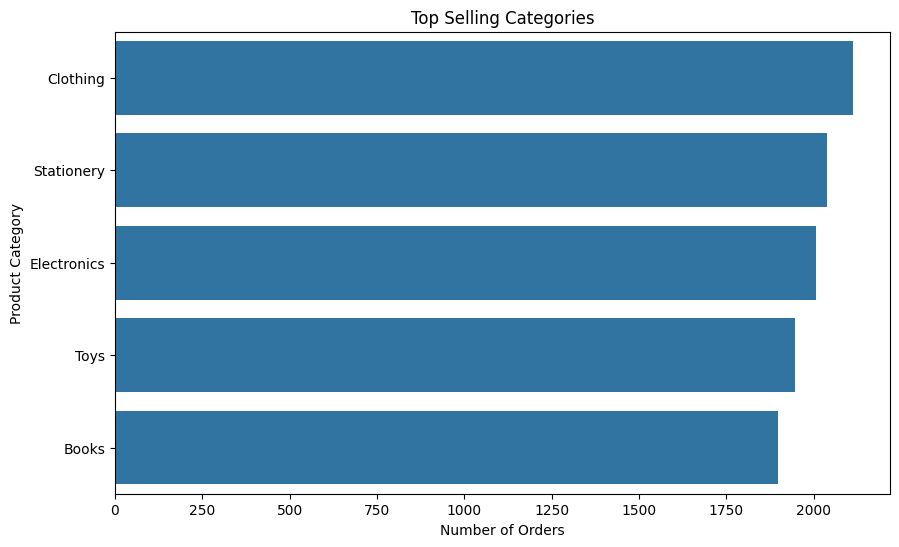

In [24]:
# Example Visualization: Top Selling Categories
plt.figure(figsize=(10, 6))
sns.countplot(y='product_category', data=data, order=data['product_category'].value_counts().index)
plt.title('Top Selling Categories')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.show() 

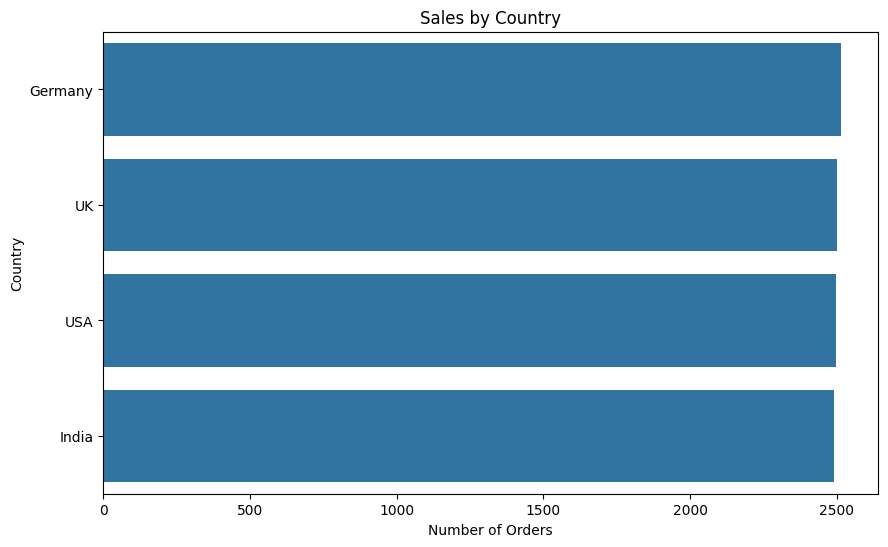

In [25]:
# Example Visualization: Sales by Country
plt.figure(figsize=(10, 6))
sns.countplot(y='country', data=data, order=data['country'].value_counts().index)
plt.title('Sales by Country')
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.show() 

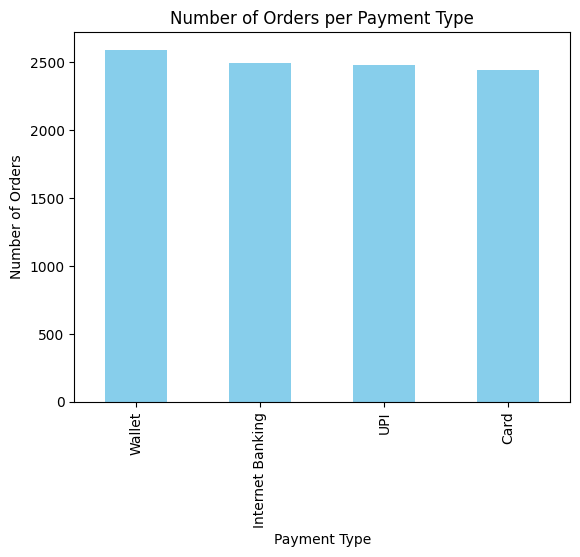

In [26]:
# Example Visualization: Number of Orders per Payment Type
payment_type_counts = data['payment_type'].value_counts()
payment_type_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Orders per Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')
plt.show()

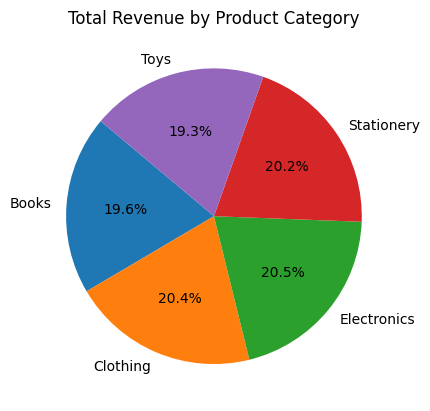

In [27]:
# Example Visualization: Total Revenue by Product Category
data['revenue'] = data['qty'] * data['price']
category_revenue = data.groupby('product_category')['revenue'].sum()
category_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Revenue by Product Category')
plt.ylabel('')
plt.show()